# MD004 ENTREGA8 NAIVE BAYES & ANÁLISIS DE SENTIMIENTO


###### **Trabajo del Tema 8**

**Descripción de la tarea:**

El csv adjunto incluye reviews que han dejado usuarios en la Google Play Store en referencia a 23 apps, incluyendo una valoración categórica sobre el análisis de sentimiento. Los datos son los siguientes:

- package_name: Nombre de la app
- review: Texto del usuario con la review
- polarity: Sentimiento de polaridad de la review:
    - 1: Review con un sentimiento muy positivo o muy negativo
    - 0: Review con un sentimiento neutro (-->realizo una pequeña corrección, el enunciado ponía '2')

**Se pide:**

1. **Limpieza de instancias (3.5p)**: Limpieza de texto de las instancias. Se valorará el uso de las técnicas empleadas y las explicaciones en el notebook
2. **Creación de modelo clasificador de Naive Bayes (3.5p)**: Se valorará el uso de técnicas empleadas como el split entre entrenamiento y validación y selección de métrica de optimización
3. **Optimización del modelo (2p)**: En base a los resultados obtenidos, ¿Somos capaces de mejorar nuestro modelo? Se valorará el uso de ténicas como Laplace smoothing, uso de 
la variable categórica package_name
4. **Conclusiones y vías abiertas (1p)**: ¿Qué resultados obtenemos en el modelo?, ¿Predice correctamente?, ¿En todas las apps?, ¿Qué datos podrían ayudarnos a mejorar la predicción?

**>> este ejercicio no tiene una solución única<<** Muchas opciones pueden ser válidas, pero se espera que se haga una interpretación de los datos obtenidos en todos los puntos y que se construya un modelo de Naive Bayes acorde a lo analizado (Si la clasificación es válida, por qué lo es y si no llega a serlo, por qué no lo es y cómo podrían mejorarse los resultados)

<font color='red'> **Entrega: fichero Jupyter Notebook con MD004NombreApellidosAC08.ipynb y fichero .pdf con MD004NombreApellidosAC08.pdf** </font>

In [266]:
library(tidyverse)
library(FSelectorRcpp)
library(caret)
library(ggplot2)
library(GGally)
library(gridExtra)
library(olsrr)
library(tidyverse)
library(caret)
library(lmtest)
library(gridExtra)
library(broom)
library(dplyr)
library(corrplot)
library(rlang)
library(e1071)
library(tm)
library(SnowballC)
library(wordcloud)
library(gmodels)

In [267]:
data = read.csv(file='sentiment_dataset.csv', header=TRUE, sep=',', dec='.', encoding = "UTF-8")

In [268]:
head(data)
tail(data)


,package_name,review,polarity
,<chr>,<chr>,<int>
1,com.facebook.katana,privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online.,0
2,com.facebook.katana,"messenger issues ever since the last update, initial received messages don't get pushed to the messenger app and you don't get notification in the facebook app or messenger app. you open the facebook app and happen to see you have a message. you have to click the icon and it opens messenger. subsequent messages go through messenger app, unless you close the chat head... then you start over with no notification and having to go through the facebook app.",0
3,com.facebook.katana,profile any time my wife or anybody has more than one post and i view them it would take me to there profile so that i can view them all at once. now when i try to view them it tells me that the page that i requested is not available. i've restarted my phone i even cleard the cache and i've uninstalled and reinstalled the app and it is still doing it. please fix it thank you,0
4,com.facebook.katana,the new features suck for those of us who don't have a working back button can you guys make the videos able to be slid to the left to exit the video. as i have to force close facebook to exit,0
5,com.facebook.katana,"forced reload on uploading pic on replying comment last night i tried to reply a comment by uploading a photo from my phone. when i press on the button to select photos the app automatically goes back to the main page. on other occasions, i could enter to my gallery to select my image but as soon as i selected an image and press done, the program, again, forced reload and suddenly go back to the main page. please fix this and i will change my rating. thank you.",0
6,com.facebook.katana,"idk i can't edit my posts? things such as my profile picture, when i edit it, it becomes grey and says that it is no longer available. please fix. i have an htc desire. will rate 5 stars shown fixed đ",0


,package_name,review,polarity
,<chr>,<chr>,<int>
886,com.rovio.angrybirds,too many ads far more adverts than any other game i've played. i know it's free and they need the ads to make a profit but there needs to be a balance.,1
887,com.rovio.angrybirds,loved it i loooooooooooooovvved it because it is incredible awesome and it's in go power and make a new clash of clans the same thing butt better,1
888,com.rovio.angrybirds,all time legendary game the birthday party levels and short fuse levels are fantastic.especially when the pigs crash onto different chemicals is just great.suggestion to all those players who cringe about too much ads is close ur wi-fi connection and then play the game.then the ads won't trouble you.,1
889,com.rovio.angrybirds,"ads are way to heavy listen to the bad reviews. there are ads after every round, whether you pass it or fail it. sometimes there are ads before the next round starts to. you spend more time on ads than game play. i develop web apps, and honestly many people rely on ads to make a living. i can appreciate that all to well. however, these developers have went far beyond that. frankly, they are disrespectful nitwits.",0
890,com.rovio.angrybirds,"fun works perfectly well. ads aren't as annoying as you think, especially for a free game.",1
891,com.rovio.angrybirds,they're everywhere i see angry birds everywhere because i can't stop playing this game. get out my head devs! 4 đ because nothing's perfect,1


## <font color='#3d59c6'>  TRANSFORMACIÓN Y LIMPIEZA DEL DATASET </font>

In [269]:
table(data$package_name)


        com.android.chrome        com.dropbox.android 
                        39                         40 
              com.evernote        com.facebook.katana 
                        40                         40 
         com.facebook.orca    com.google.android.talk 
                        40                         39 
         com.hamrokeyboard             com.hamropatro 
                        39                         38 
     com.imangi.templerun2    com.king.candycrushsaga 
                        40                         40 
      com.linkedin.android      com.opera.mini.native 
                        40                         40 
      com.rovio.angrybirds    com.shirantech.kantipur 
                        39                         36 
                 com.Slack com.supercell.clashofclans 
                        40                         40 
            com.tencent.mm        com.twitter.android 
                        39                         39 
         

Clases proporcionadas, excepto el paquete de jabanaki.todo.todoly. Vamos a ver si hay nulos o celdas vacías

In [270]:
any(is.na(data))

[1] FALSE

No tenemos nulos, ahora vamos a contar los caracteres que tenemos en las descripciones para ver más o menos el tamaño de los textos.

In [271]:
data$text_count <- nchar(data$review)
head(data)
summary(data)

,package_name,review,polarity,text_count
,<chr>,<chr>,<int>,<int>
1,com.facebook.katana,privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online.,0,386
2,com.facebook.katana,"messenger issues ever since the last update, initial received messages don't get pushed to the messenger app and you don't get notification in the facebook app or messenger app. you open the facebook app and happen to see you have a message. you have to click the icon and it opens messenger. subsequent messages go through messenger app, unless you close the chat head... then you start over with no notification and having to go through the facebook app.",0,457
3,com.facebook.katana,profile any time my wife or anybody has more than one post and i view them it would take me to there profile so that i can view them all at once. now when i try to view them it tells me that the page that i requested is not available. i've restarted my phone i even cleard the cache and i've uninstalled and reinstalled the app and it is still doing it. please fix it thank you,0,378
4,com.facebook.katana,the new features suck for those of us who don't have a working back button can you guys make the videos able to be slid to the left to exit the video. as i have to force close facebook to exit,0,193
5,com.facebook.katana,"forced reload on uploading pic on replying comment last night i tried to reply a comment by uploading a photo from my phone. when i press on the button to select photos the app automatically goes back to the main page. on other occasions, i could enter to my gallery to select my image but as soon as i selected an image and press done, the program, again, forced reload and suddenly go back to the main page. please fix this and i will change my rating. thank you.",0,466
6,com.facebook.katana,"idk i can't edit my posts? things such as my profile picture, when i edit it, it becomes grey and says that it is no longer available. please fix. i have an htc desire. will rate 5 stars shown fixed đ",0,204


 package_name          review             polarity        text_count   
 Length:891         Length:891         Min.   :0.0000   Min.   :  6.0  
 Class :character   Class :character   1st Qu.:0.0000   1st Qu.:145.0  
 Mode  :character   Mode  :character   Median :0.0000   Median :210.0  
                                       Mean   :0.3446   Mean   :231.9  
                                       3rd Qu.:1.0000   3rd Qu.:292.5  
                                       Max.   :1.0000   Max.   :910.0  

In [272]:
table(data$polarity)
# Proporción de clases
round(prop.table(table(data$polarity))*100, digits = 1)


  0   1 
584 307 


   0    1 
65.5 34.5 

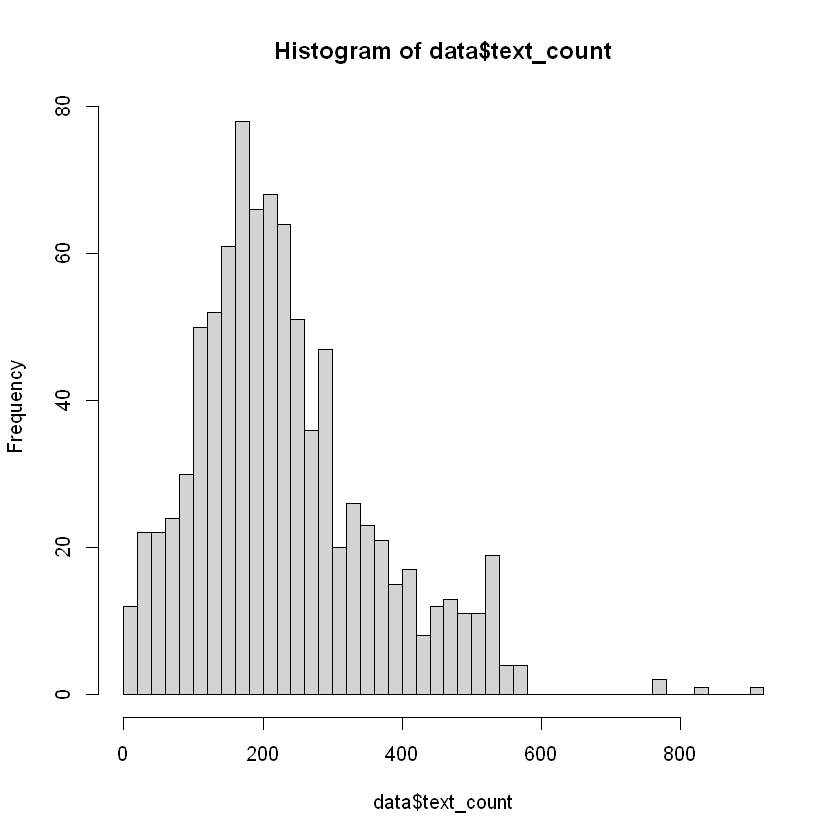

In [273]:
hist(data$text_count,breaks = 50)

Vemos un poco la distribución de nuestros datos, y vemos como hay muchas mas reviews con impacto neutral.

A continuación vamos a tratar un poco más la columna de reviews.
Nuestro objetivo en este punto será crear un mapa de palabras, analizar qué palabras se repiten más, etc 
Lo primero que haremos será aplicar la función VectorSource() esto nos tratará cada fila como si fuese un documento. Luego con VCorpus() alamcenaremos esta colección de "datos" (documentos).

**VENTAJAS**

- A nivel computacional los datos se guardan en la memoria, por lo que computacionalmente es más eficiente
- El tipo de almacenamiento corpus tiene funciones que nos permiten manipular textos de una forma eficiente con funciones predefinidas

In [274]:
data_corpus = VCorpus(VectorSource(data$review),readerControl = list(language = 'es'))
print(data_corpus)

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 891


In [275]:
# Esta transformación cambia todas las mayúsculas a minúsculas
data_corpus_clean = tm_map(data_corpus, content_transformer(tolower))
# Visualización de la instancia antes y después de la transformación
print(lapply(data_corpus[[1]][1], as.character))
print(lapply(data_corpus_clean[[1]][1], as.character))

$content
[1] " privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online."

$content
[1] " privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online."



In [276]:
# Esta transformación retira números y palabras conectoras de lenguaje y a texto plano
data_corpus_clean = tm_map(data_corpus_clean, removeNumbers) 
data_corpus_clean = tm_map(data_corpus_clean, removeWords, stopwords("english"))

# Visualización de la instancia antes y después de la transformación
print(lapply(data_corpus[[1]][1], as.character))
print(lapply(data_corpus_clean[[1]][1], as.character))

$content
[1] " privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online."

$content
[1] " privacy  least put  option appear offline.  mean   people like    big pressure   seen online like  need  response  every message  else   called seenzone .    wanna   facebook   read   newsfeed  just wanna response  message  want . pls reconsidered  review.  tried  turn  chat  still can see   online."



In [277]:
#Eliminamos los signos de puntuación
data_corpus_clean <- tm_map(data_corpus_clean, removePunctuation)
print(lapply(data_corpus[[1]][1], as.character))
print(lapply(data_corpus_clean[[1]][1], as.character))

$content
[1] " privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online."

$content
[1] " privacy  least put  option appear offline  mean   people like    big pressure   seen online like  need  response  every message  else   called seenzone     wanna   facebook   read   newsfeed  just wanna response  message  want  pls reconsidered  review  tried  turn  chat  still can see   online"



In [278]:
# sustituye puntuaciones por espacios
replacePunctuation = function(x) {gsub('[[:punct:]]', ' ', x)}

data_corpus_clean = tm_map(data_corpus_clean, replacePunctuation)
# Visualización de la instancia antes y después de la transformación
print(lapply(data_corpus[[1]][1], as.character))
print(lapply(data_corpus_clean[[1]][1], as.character))

$content
[1] " privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online."

[[1]]
[1] " privacy  least put  option appear offline  mean   people like    big pressure   seen online like  need  response  every message  else   called seenzone     wanna   facebook   read   newsfeed  just wanna response  message  want  pls reconsidered  review  tried  turn  chat  still can see   online"



In [279]:
#Creamos una función que sustituya las letras con acentos por letras sin acentos
# Como estamos en ingles, no debería de haber acentos, todo y que puede ser que se usen palabras procedentes de otros países y que los angloparlantes conserven los acentos

removeAccents = function(x) chartr('àáèéìíòóùú', 'aaeeiioouu', x)
data_corpus_clean = tm_map(data_corpus_clean, removeAccents)
print(lapply(data_corpus[[1]][1], as.character))
print(lapply(data_corpus_clean[[1]][1], as.character))

$content
[1] " privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online."

[[1]]
[1] " privacy  least put  option appear offline  mean   people like    big pressure   seen online like  need  response  every message  else   called seenzone     wanna   facebook   read   newsfeed  just wanna response  message  want  pls reconsidered  review  tried  turn  chat  still can see   online"



In [280]:
#Elimina los dobles espacios y los sustituye por un solo espacio
data_corpus_clean = tm_map(data_corpus_clean, stripWhitespace)
# Visualización de la instancia antes y después de la transformación
print(lapply(data_corpus[[1]][1], as.character))
print(lapply(data_corpus_clean[[1]][1], as.character))

$content
[1] " privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online."

[[1]]
[1] " privacy least put option appear offline mean people like big pressure seen online like need response every message else called seenzone wanna facebook read newsfeed just wanna response message want pls reconsidered review tried turn chat still can see online"



A través de tm_map podemos invocar a la función **stemDocument** con el objetivo de unificar aquellos términos que aportan la misma información (tienen la misma base semántica)

In [281]:
data_corpus_clean = tm_map(data_corpus_clean, stemDocument, language = 'en')
print(lapply(data_corpus[[1]][1], as.character))
print(lapply(data_corpus_clean[[1]][1], as.character))

$content
[1] " privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online."

[[1]]
[1] "privaci least put option appear offlin mean peopl like big pressur seen onlin like need respons everi messag els call seenzon wanna facebook read newsfe just wanna respons messag want pls reconsid review tri turn chat still can see onlin"



In [282]:
# especificando un vector de palabras comunes a ser eliminadas
#Se han escogido las 10 palabras más usadas, los 5 verbos y los 5 sustantivos
data_corpus_clean = tm_map(data_corpus_clean, removeWords, c('the', 'be','to','of','and','a','in','that','have','I','do','say','get','time','person','year','way','day'))

In [283]:
#Transforma a documentos de texto plano
data_corpus_clean = tm_map(data_corpus_clean, PlainTextDocument)

In [284]:
for (i in (1:5))
{
    print(paste0("subject number ", i))
    print(lapply(data_corpus[[i]][1], as.character))
    print(lapply(data_corpus_clean[[i]][1], as.character))
}

[1] "subject number 1"
$content
[1] " privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online."

$content
[1] "privaci least put option appear offlin mean peopl like big pressur seen onlin like need respons everi messag els call seenzon wanna facebook read newsfe just wanna respons messag want pls reconsid review tri turn chat still can see onlin"

[1] "subject number 2"
$content
[1] " messenger issues ever since the last update, initial received messages don't get pushed to the messenger app and you don't get notification in the facebook app or messenger app. you open the facebook app and happen to see you have a message. you have to click the icon and it opens 

## <font color='#3d59c6'> LO MISMO PERO DECLARANDO UNA FUNCIÓN </font>

Se incluye la función stemDocument >> A través de tm_map podemos invocar a la función stemDocument con el objetivo de unificar aquellos términos que aportan la misma información (tienen la misma base semántica)

In [285]:
replacePunctuation = function(x) {gsub('[[:punct:]]', ' ', x)}
removeAccents = function(x) chartr('àáèéìíòóùú', 'aaeeiioouu', x)

#después de llegar al dataframe, nos hemos dado cuenta de que tenemos que eliominar caracteres especiales, con la función de abajo, simplemente nos quedaremos con minisculas
#que es lo mismo que eliminar los emojis y todo lo especial
keepOnlyLetters <- function(x) gsub("[^a-z]", " ", x)

clean_corpus = function(corpus){
               data_corpus_clean = tm_map(corpus, content_transformer(tolower))
               data_corpus_clean = tm_map(data_corpus_clean, removeNumbers)   
               data_corpus_clean = tm_map(data_corpus_clean, removeWords, stopwords('english'))
               data_corpus_clean = tm_map(data_corpus_clean, removeWords, stopwords())        
               data_corpus_clean = tm_map(data_corpus_clean, removePunctuation)     
               data_corpus_clean = tm_map(data_corpus_clean, replacePunctuation)    
               data_corpus_clean = tm_map(data_corpus_clean, removeAccents)    
               data_corpus_clean = tm_map(data_corpus_clean, stripWhitespace)      
               data_corpus_clean = tm_map(data_corpus_clean, removeWords, c('the', 'be','to','of','and','a','in','that','have','I','do','say','get','time','person','year','way','day'))   
               data_corpus_clean = tm_map(data_corpus_clean, stemDocument, 'english')   
               data_corpus_clean = tm_map(data_corpus_clean, PlainTextDocument)   
  return(data_corpus_clean)
}
clean_corpus2 = function(corpus){
               data_corpus_clean = tm_map(corpus, content_transformer(tolower))
               data_corpus_clean = tm_map(corpus, keepOnlyLetters) 
               data_corpus_clean = tm_map(data_corpus_clean, removeNumbers)   
               data_corpus_clean = tm_map(data_corpus_clean, removeWords, stopwords('english'))
               data_corpus_clean = tm_map(data_corpus_clean, removeWords, stopwords())        
               data_corpus_clean = tm_map(data_corpus_clean, removePunctuation)     
               data_corpus_clean = tm_map(data_corpus_clean, replacePunctuation)    
               data_corpus_clean = tm_map(data_corpus_clean, removeAccents)    
               data_corpus_clean = tm_map(data_corpus_clean, stripWhitespace)   
               data_corpus_clean = tm_map(data_corpus_clean, stemDocument, 'english')   
               data_corpus_clean = tm_map(data_corpus_clean, PlainTextDocument) 
               
               #Esta linea se ha ido modificando a medida que se ha ido viendo el dataset
               data_corpus_clean = tm_map(data_corpus_clean, removeWords, c('the', 'be','to','of','and','a','in',
              'use ',' use','app ','that','have','I','do','say','get','time','person','year','way','day','app','use','game', 'can'))    
               
  return(data_corpus_clean)
}


In [286]:
data_corpus = VCorpus(VectorSource(data$review),readerControl = list(language = 'en'))
data_corpus_clean = clean_corpus(data_corpus) 
print(lapply(data_corpus[[1]][1], as.character))
print(lapply(data_corpus_clean[[1]][1], as.character))

$content
[1] " privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online."

$content
[1] "privaci least put option appear offlin mean peopl like big pressur seen onlin like need respons everi messag els call seenzon wanna facebook read newsfe just wanna respons messag want pls reconsid review tri turn chat still can see onlin"



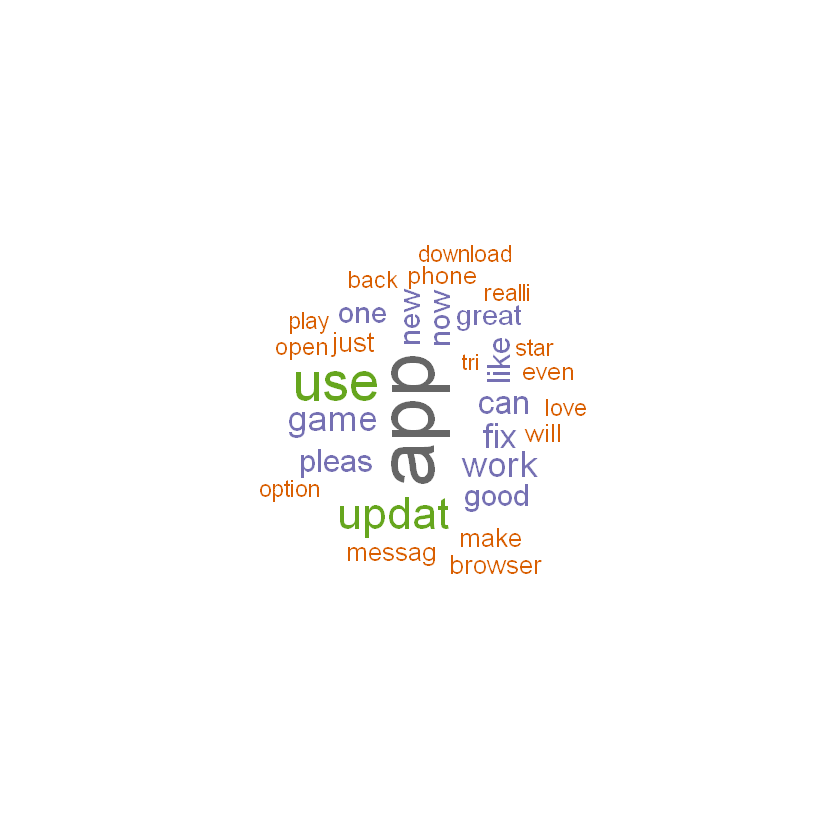

In [287]:
wordcloud(data_corpus_clean, max.words = 30, random.order = F, colors = brewer.pal(name = "Dark2", n = 8))

Vemos que app es muy usada, y tiene sentido puesto que son reviews de aplicación, así pues, está palabra se ha deciddido eliminarla. Además, estamos analizando el sentimiento. por lo tanto también eliminaremos use, ya puede encontrarse tanto en aspectos positivos, negativos o neutrales. También eliminaremos game, ya que si que es verdad que hay aplicaciones que no son juegos, pero debido a la intención de nuestro analisis donde necesitamos analizar el sentimiento, game no aporta una connotación clara. Debido a que tambien nos hemos quedado con la raiz. La palabra can ha dejado de aportar informacion, ya que no sabemos si es can't o can, por lo tanto, también la eliminaremos.

In [288]:
data_corpus2 = VCorpus(VectorSource(data$review),readerControl = list(language = 'en'))
data_corpus_clean2 = clean_corpus2(data_corpus2) 
print(lapply(data_corpus2[[1]][1], as.character))
print(lapply(data_corpus_clean2[[1]][1], as.character))

$content
[1] " privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online."

$content
[1] "privaci least put option appear offlin mean peopl like s big pressur seen onlin like need respons everi messag els call seenzon wanna facebook read newsfe just wanna respons messag want pls reconsid review tri turn chat still  see onlin"



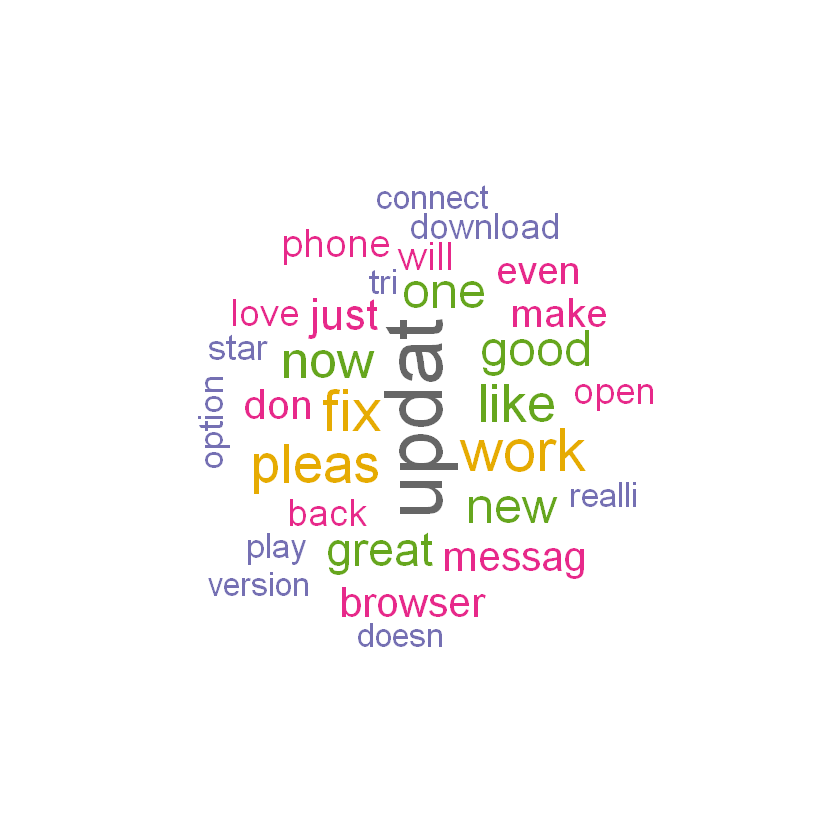

In [289]:
wordcloud(data_corpus_clean2, max.words = 30, random.order = F, colors = brewer.pal(name = "Dark2", n = 8))

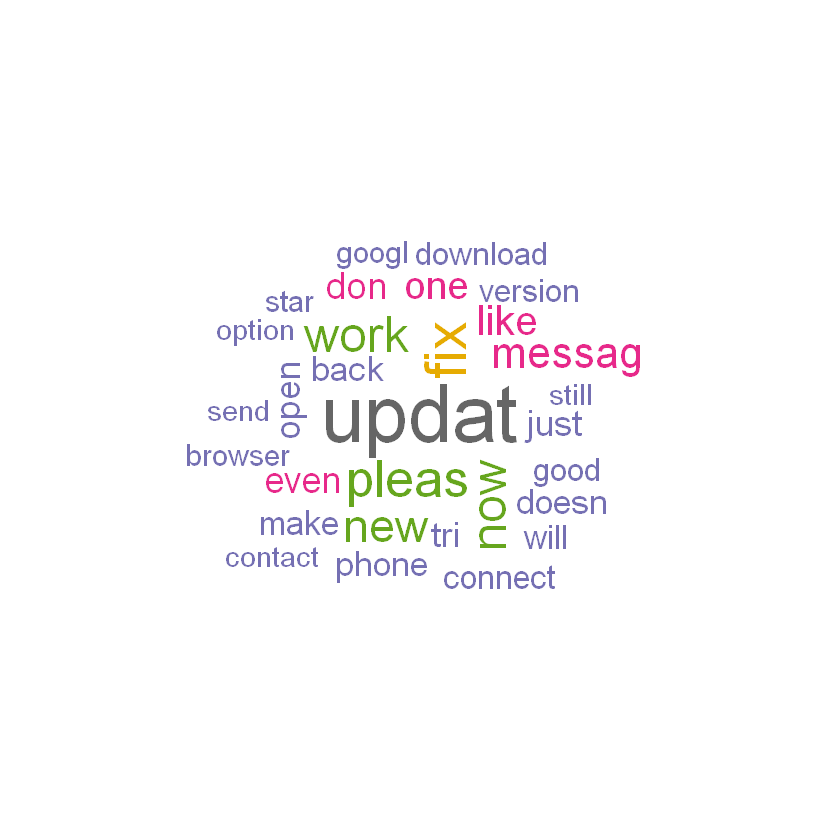

In [290]:
data_subset_0 = subset(data, data$polarity == 0)
data_corpus_0 = VCorpus(VectorSource(data_subset_0$review),readerControl = list(language = 'es'))
data_corpus_clean_0 = clean_corpus2(data_corpus_0) 

wordcloud(data_corpus_clean_0, max.words = 30, random.order = F, colors = brewer.pal(name = "Dark2", n = 8))

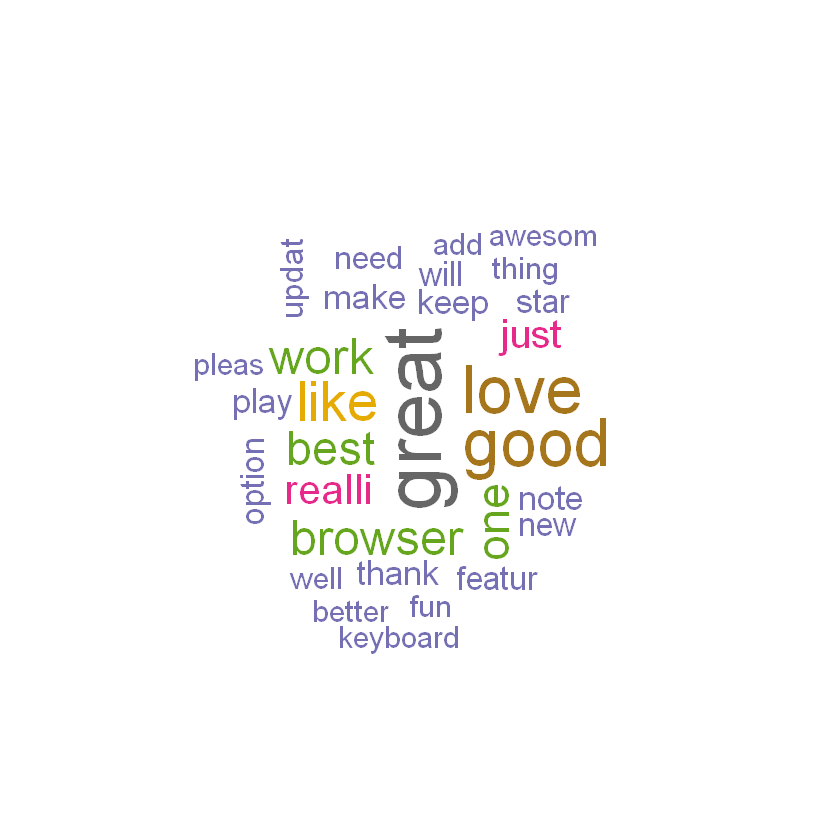

In [291]:
data_subset_1 = subset(data, data$polarity == 1)
data_corpus_1 = VCorpus(VectorSource(data_subset_1$review),readerControl = list(language = 'es'))
data_corpus_clean_1 = clean_corpus2(data_corpus_1) 

wordcloud(data_corpus_clean_1, max.words = 30, random.order = F, colors = brewer.pal(name = "Dark2", n = 8))

Aún así, vemos como aún se nos han filtrado palabras que no queremos (app, use). Así pues después, cuando tengamos el dataframe ya haremos una segunda limpieza.

## <font color='#3d59c6'>  SEPARACIÓN TRAIN & TEST </font>

Ahora transformaremos cada mensaje en palabras independientes para construir la estructura del análisis mediante una matrix compuesta por:

- Las columnas son la unión de todas las palabras definidas en el corpus
- Las filas son cada una de las instancias de los mensajes tal y como viene definido en el dataset entrante
- Los valores son el número de veces que se repite cada palabra en cada mensaje

La matriz generada estará compuesta principalmente de instancias de valor 0. La función *DocumentTermMatrix* nos ayudará a generar este conjunto.

In [292]:
print(lapply(data_corpus_clean2[[1]][1], as.character))

$content
[1] "privaci least put option appear offlin mean peopl like s big pressur seen onlin like need respons everi messag els call seenzon wanna facebook read newsfe just wanna respons messag want pls reconsid review tri turn chat still  see onlin"



In [293]:
dtm = DocumentTermMatrix(data_corpus_clean2)
dtm

<<DocumentTermMatrix (documents: 891, terms: 2630)>>
Non-/sparse entries: 15635/2327695
Sparsity           : 99%
Maximal term length: 24
Weighting          : term frequency (tf)

In [294]:
str(dtm)

List of 6
 $ i       : int [1:15635] 1 1 1 1 1 1 1 1 1 1 ...
 $ j       : int [1:15635] 121 240 336 383 716 765 810 1220 1279 1299 ...
 $ v       : num [1:15635] 1 1 1 1 1 1 1 1 1 2 ...
 $ nrow    : int 891
 $ ncol    : int 2630
 $ dimnames:List of 2
  ..$ Docs : chr [1:891] "character(0)" "character(0)" "character(0)" "character(0)" ...
  ..$ Terms: chr [1:2630] "aafnaii" "aakhirat" "aalikati" "aap" ...
 - attr(*, "class")= chr [1:2] "DocumentTermMatrix" "simple_triplet_matrix"
 - attr(*, "weighting")= chr [1:2] "term frequency" "tf"


In [295]:
colnames(dtm)

[1] "aafnaii"                  "aakhirat"                
   [3] "aalikati"                 "aap"                     
   [5] "aapsssssss"               "aaru"                    
   [7] "abil"                     "abk"                     
   [9] "abl"                      "absolut"                 
  [11] "absurd"                   "acc"                     
  [13] "acceces"                  "accept"                  
  [15] "acces"                    "access"                  
  [17] "accid"                    "accomplish"              
  [19] "accord"                   "accordion"               
  [21] "account"                  "accumul"                 
  [23] "accur"                    "achiev"                  
  [25] "achiv"                    "across"                  
  [27] "act"                      "action"                  
  [29] "activ"                    "actual"                  
  [31] "adag"                     "adblock"                 
  [33] "add"                      "addict"                  
  [35] "addit"                    "addon"                   
  [37] "address"                  "adequ"                   
  [39] "adjust"                   "admin"                   
  [41] "admit"                    "advanc"                  
  [43] "advantag"                 "adventur"                
  [45] "advert"                   "advertis"                
  [47] "advic"                    "advis"                   
  [49] "aesthet"                  "affect"                  
  [51] "affirm"                   "aficionado"              
  [53] "afloat"                   "afterward"               
  [55] "age"                      "agenda"                  
  [57] "agent"                    "aggres"                  
  [59] "ago"                      "agre"                    
  [61] "ahead"                    "ain"                     
  [63] "air"                      "airlin"                  
  [65] "akash"                    "album"                   
  [67] "alert"                    "ali"                     
  [69] "allahsubhanahutallah"     "allow"                   
  [71] "allreadi"                 "almost"                  
  [73] "alon"                     "along"                   
  [75] "alot"                     "alphabet"                
  [77] "alreadi"                  "alright"                 
  [79] "also"                     "alter"                   
  [81] "altern"                   "although"                
  [83] "altogeth"                 "alway"                   
  [85] "amaz"                     "ambienc"                 
  [87] "america"                  "american"                
  [89] "among"                    "amount"                  
  [91] "analys"                   "anchor"                  
  [93] "ancient"                  "android"                 
  [95] "aney"                     "angri"                   
  [97] "anim"                     "annapurna"               
  [99] "annoy"                    "anon"                    
 [101] "anoth"                    "anoy"                    
 [103] "answer"                   "anti"                    
 [105] "anurodh"                  "anwer"                   
 [107] "anybodi"                  "anymor"                  
 [109] "anyon"                    "anyth"                   
 [111] "anytim"                   "anyttim"                 
 [113] "anyway"                   "anywher"                 
 [115] "aosp"                     "apart"                   
 [117] "api"                      "apk"                     
 [119] "appar"                    "appeal"                  
 [121] "appear"                   "appl"                    
 [123] "appli"                    "appliat"                 
 [125] "applic"                   "appp"                    
 [127] "appreci"                  "approach"                
 [129] "appropri"                 "approv"                  
 [131] "aprrox"                   "aqu

Vemos que tenemos que limpiar más nuestro dataset, y eliminaremos todas las columnas que contengan \u. --> Ya no aplica al actual codigo.

In [296]:
#Establecemos las frecuencias de cada término sumando las columnas 
termFreq = colSums(as.matrix(dtm))
head(termFreq)

aafnaii   aakhirat   aalikati        aap aapsssssss       aaru 
         1          1          1          4          1          1

In [297]:
#Creamos el nuevo data set
tabla_frec = data.frame(term = names(termFreq), freq = termFreq)
head(tabla_frec)

,term,freq
,<chr>,<dbl>
aafnaii,aafnaii,1
aakhirat,aakhirat,1
aalikati,aalikati,1
aap,aap,4
aapsssssss,aapsssssss,1
aaru,aaru,1


In [298]:
#Ordenamos por frecuencias descendientes
tabla_frec = tabla_frec[order(-tabla_frec[,2]),]
head(tabla_frec)

,term,freq
,<chr>,<dbl>
updat,updat,248
work,work,177
fix,fix,172
pleas,pleas,157
like,like,154
now,now,147


In [299]:
#eliminamos el text count
data$text_count <- NULL

In [300]:
set.seed(555)
 
# Creamos el data partition de la función caret con un 70 - 30 split
inTrain <- createDataPartition(y = data$polarity
                                  , p = .70
                                  , list = FALSE
                                  , times = 1)
# Definitmos los datasets originales entre train y test
data.train<-data[inTrain,]
data.test<-data[-inTrain,]
# Revisamos el split
str(data.train)
str(data.test)

'data.frame':	624 obs. of  3 variables:
 $ package_name: chr  "com.facebook.katana" "com.facebook.katana" "com.facebook.katana" "com.facebook.katana" ...
 $ review      : chr  " privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen"| __truncated__ " messenger issues ever since the last update, initial received messages don't get pushed to the messenger app a"| __truncated__ " profile any time my wife or anybody has more than one post and i view them it would take me to there profile s"| __truncated__ " the new features suck for those of us who don't have a working back button can you guys make the videos able t"| __truncated__ ...
 $ polarity    : int  0 0 0 0 0 0 0 0 0 0 ...
'data.frame':	267 obs. of  3 variables:
 $ package_name: chr  "com.facebook.katana" "com.facebook.katana" "com.facebook.katana" "com.facebook.katana" ...
 $ review      : chr  " forced reload on uploading pic on replying comment last night i tried to reply a

In [301]:
data_corpus_clean2

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 891

In [302]:
# Separamos el corpus según la clase
corpus.train = data_corpus_clean2[inTrain]
corpus.test  = data_corpus_clean2[-inTrain]

# Y finalmente el Document term matrix
dtm.train = dtm[inTrain, ]
dtm.test  = dtm[-inTrain, ]

# Comprobamos que el desbalanceo de clases es el adecuado
print("Training")
round(prop.table(table(data.train$polarity))*100, 2)
print("Test")
round(prop.table(table(data.test$polarity))*100, 2)

[1] "Training"



    0     1 
66.19 33.81 

[1] "Test"



    0     1 
64.04 35.96 

In [303]:
#Encontramos todas las palabras que se repiten más de 3 veces
freq_terms = findFreqTerms(dtm.train, 2)
freq_terms

[1] "aap"          "abil"         "abl"          "absolut"     
   [5] "access"       "account"      "achiev"       "across"      
   [9] "act"          "action"       "activ"        "actual"      
  [13] "add"          "addict"       "addit"        "address"     
  [17] "adjust"       "advertis"     "ago"          "ain"         
  [21] "alert"        "allow"        "almost"       "along"       
  [25] "alreadi"      "also"         "altern"       "although"    
  [29] "alway"        "amaz"         "among"        "amount"      
  [33] "android"      "angri"        "annapurna"    "annoy"       
  [37] "anoth"        "anoy"         "answer"       "anybodi"     
  [41] "anymor"       "anyon"        "anyth"        "anytim"      
  [45] "appeal"       "appear"       "appl"         "appli"       
  [49] "applic"       "appreci"      "aren"         "around"      
  [53] "artifact"     "asap"         "ask"          "aspect"      
  [57] "asus"         "atleast"      "attack"       "attract"     
  [61] "audio"        "auto"         "autom"        "automat"     
  [65] "avail"        "averag"       "away"         "awesom"      
  [69] "awhil"        "awsom"        "back"         "background"  
  [73] "backup"       "bad"          "bait"         "balanc"      
  [77] "balloon"      "bar"          "base"         "basic"       
  [81] "batteri"      "beauti"       "becam"        "becom"       
  [85] "beep"         "begin"        "behind"       "belong"      
  [89] "besid"        "best"         "beta"         "better"      
  [93] "beyond"       "big"          "bigger"       "bird"        
  [97] "bit"          "black"        "blank"        "block"       
 [101] "bolt"         "bomb"         "bonus"        "book"        
 [105] "bookmark"     "boost"        "booster"      "bore"        
 [109] "bother"       "bottom"       "bought"       "box"         
 [113] "break"        "brilliant"    "bring"        "broke"       
 [117] "broken"       "brows"        "browser"      "bubbl"       
 [121] "bug"          "build"        "built"        "bullet"      
 [125] "bullshit"     "busi"         "butt"         "button"      
 [129] "buy"          "cach"         "calendar"     "call"        
 [133] "came"         "camera"       "cancel"       "candi"       
 [137] "cant"         "cap"          "capit"        "card"        
 [141] "care"         "case"         "cast"         "caus"        
 [145] "cell"         "cellular"     "certain"      "challeng"    
 [149] "chanc"        "chang"        "channel"      "charg"       
 [153] "chat"         "chathead"     "cheap"        "check"       
 [157] "chines"       "choic"        "choos"        "christma"    
 [161] "chrome"       "chromecast"   "chronolog"    "clan"        
 [165] "clash"        "classic"      "clean"        "cleaner"     
 [169] "clear"        "click"        "client"       "clip"        
 [173] "clog"         "close"        "cloud"        "clutter"     
 [177] "coc"          "code"         "collect"      "color"       
 [181] "colour"       "come"         "command"      "comment"     
 [185] "communic"     "compani"      "compar"       "compat"      
 [189] "compet"       "complain"     "complaint"    "complet"     
 [193] "comput"       "con"          "concern"      "confus"      
 [197] "connect"      "consid"       "constant"     "contact"     
 [201] "content"      "continu"      "control"      "convers"     
 [205] "cool"         "copi"         "core"         "corner"      
 [209] "correct"      "couldn"       "coupl"        "coz"         
 [213] "cpu"          "crap"         "crash"        "crazi"       
 [217] "creat"        "creator"      "credit"       "crop"        
 [221] "cross"        "crush"        "currenc"      "current"     
 [225] "custom"       "cut"          "daili"        "damn"        
 [229] "dark"         "data"         "date"         "dead"        
 [233] "deal"         "dear"         "decemb"       "declin"      
 [237] "decreas"      "default"      "defin"      

In [304]:
#Recortamos el data set con las palabras con una frecuencia superior a 3
freq_terms = findFreqTerms(dtm.train, 2)
reduced_dtm.train = DocumentTermMatrix(corpus.train, list(dictionary=freq_terms))
reduced_dtm.test = DocumentTermMatrix(corpus.test, list(dictionary=freq_terms))

#Revisamos cuantas columnas reducimos
ncol(dtm.train)
ncol(reduced_dtm.train)
ncol(dtm.test)
ncol(reduced_dtm.test)

[1] 2630

[1] 1157

[1] 2630

[1] 1157

## <font color='#3d59c6'>  CLASIFICADOR NAIVE BAYES </font>

Naive Bayes funciona con factores mientras que nuestra estructura DRT tiene valores numéricos. A continuación definimos una función que nos ayude a convertir números en factores y aplicarlo en las matrices reducidas:

In [305]:
head(reduced_dtm.train)

<<DocumentTermMatrix (documents: 6, terms: 1157)>>
Non-/sparse entries: 121/6821
Sparsity           : 98%
Maximal term length: 12
Weighting          : term frequency (tf)

In [306]:
convert_counts = function(x) {
  x = ifelse(x > 0, 1, 0)
  x = factor(x, levels = c(0, 1), labels=c("No", "Yes"))
  return (x)
}

# apply() allows us to work either with rows or columns of a matrix.
# MARGIN = 1 is for rows, and 2 for columns
reduced_dtm.train = apply(reduced_dtm.train, MARGIN=2, convert_counts)
reduced_dtm.test  = apply(reduced_dtm.test, MARGIN=2, convert_counts)

head(reduced_dtm.train_1)

,abil,abl,absolut,access,account,achiev,action,activ,actual,add,⋯,wouldn,write,wrong,wtf,wth,yahoo,yes,yet,youtub,zoom
character(0),No,No,No,No,No,No,No,No,No,No,⋯,No,No,No,No,No,No,No,No,No,No
character(0),No,No,No,No,No,No,No,No,No,No,⋯,No,No,No,No,No,No,No,No,No,No
character(0),No,No,No,No,No,No,No,No,No,No,⋯,No,No,No,No,No,No,No,No,No,No
character(0),No,Yes,No,No,No,No,No,No,No,No,⋯,No,No,No,No,No,No,No,No,No,No
character(0),No,No,No,No,No,No,No,No,No,No,⋯,No,No,No,No,No,No,No,No,No,No
character(0),No,No,No,No,No,No,No,No,No,No,⋯,No,No,No,No,No,No,No,No,No,No


In [307]:
# Almacena nuestro modelo en subject_classifier
subject_classifier <- naiveBayes(x = reduced_dtm.train_1,  # Dataset de entrenamiento
                                  y = data.train$polarity)  # Target de entrenamiento

# Realiza predicciones utilizando el modelo creado con los datos de entrenamiento
subject_test.predicted <- predict(subject_classifier,  # Modelo
                                  newdata = reduced_dtm.test_1)  # Dataset de test

In [308]:
# Ahora sacamos el confusion matrix
confusionMatrix(subject_test.predicted, factor(data.test$polarity))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 142  26
         1  29  70
                                          
               Accuracy : 0.794           
                 95% CI : (0.7405, 0.8409)
    No Information Rate : 0.6404          
    P-Value [Acc > NIR] : 3.614e-08       
                                          
                  Kappa : 0.5558          
                                          
 Mcnemar's Test P-Value : 0.7874          
                                          
            Sensitivity : 0.8304          
            Specificity : 0.7292          
         Pos Pred Value : 0.8452          
         Neg Pred Value : 0.7071          
             Prevalence : 0.6404          
         Detection Rate : 0.5318          
   Detection Prevalence : 0.6292          
      Balanced Accuracy : 0.7798          
                                          
       'Positive' Class : 0               
                              

Obtenemos casi un 80% de precision, y no se supera el test de Mcnemar y se ha probado tanto eliminando las palabras que quitamos (app, use, game, etc) como sin las palabras eliminadas, y obtenemos el mismo resultado, por lo tanto eso quiere decir que la eliminación fue correcta ya que solo aportaba ruido y no aporta una diferencia significativa.

In [309]:
# Visualizamos las instancias que han sido filtradas erróneamente
data.test[(subject_test.predicted != data.test$polarity) # Seleccionamos las instancias con error en la predicción
          & (data.test$polarity == '0'),] # Seleccionamos las instancias con etiqueta ham

,package_name,review,polarity
,<chr>,<chr>,<int>
36,com.facebook.katana,not good its previous version (12.0.0.15.14) is much good than that. i can't text directly with current version. please add the inbuilt messenger again in the app.,0
58,com.twitter.android,why is there so much space? there is so much white space and everything is so spaced out. also the notifications are always late.,0
138,com.king.candycrushsaga,i love playing candy crush but... why when u go to another episode you have to wait for along time for example i was in level 50 and i passed it and had to wait 75 hours for episode 3 the game is good and very addictive but i don't like the waiting for the episodes đł by the way good đwork,0
180,com.imangi.templerun2,temple run -pretty good the game is fun.but i would like it if it didn't have so many videos for one specific app most of the time. it would also be nice if you could choose to be a boy or a girl character. overall the game is okay/pretty good,0
194,com.imangi.templerun2,not supported i am using panasonic t10 and frozen shadows are not supported. i will be very great full if you will fix this.,0
199,com.imangi.templerun2,temple run 2 frozen shadows i love this game so much i love being in the ice but only one thing that i hate about it is that the monster goes infront of u when your running but as you go further into the game it gets harder but able to pass the monster,0
314,com.tencent.mm,"awesome voice quality the best in class audio. plz include group voice calls, only video calls have it. option to add another person between the call should be provided.",0
327,com.viber.voip,improve... please add a feature where we can see online contacts only.we are tired of searching contact and knowing that whether it is online or not...thanks .,0
334,com.viber.voip,good app for call and texting. overall everything is ok. most important thing is that the battery not drained fast when you online. please add android auto support and i will rate it 5 stars.,0


Como podemos ver, los comentarios que vemos aquí que estan fallando, en realidad si que se pueden clasificar con una sensación negativa o positiva, por eso esta realizando estos fallos. Vemos también como hay algun caso que contiene mucho emojis o estan en otro idioma. 

In [310]:
# Visualizamos las instancias que han pasado el filtro de SPAM pero que deberían haver sido filtradas
data.test[(subject_test.predicted != data.test$polarity) # Seleccionamos las instancias con error en la predicción
          & (data.test$polarity == '1'),] # Seleccionamos las instancias con etiqueta spam

,package_name,review,polarity
,<chr>,<chr>,<int>
126,com.king.candycrushsaga,memory game the levels are so hard and less moves . l do no how to pass 95 levels but levels are so bour. chico bar is very hard to finish. please any of you send me life,1
177,com.imangi.templerun2,"really love the new game, but since this update the game keeps shutting down on my s5. please fix the glitch",1
185,com.imangi.templerun2,"frozen 12/17/15 review of temple run 2.. appropriate for the age of 13 and up... great game without the redicioulous violence... provides sufficient rewards for successful achievements.... ...... you can either turn on or off google play rewards very easy in temple run settings! ! .... ..... ..... please click like, if helpful..... .... .... many thanks to their tech support and developers for their great work!!",1
224,com.supercell.clashofclans,"know how to get the account back. you have to delete clash of clans,then you download it again, then you look on the upper left corner of the screen, then you see already have a village?'' then you press it,then you will have your village.",1
233,com.supercell.clashofclans,"no longer a casual game the current version of the game makes it too hard to play casually anymore. expect to spend 4-6 hours a day, just to stay afloat.",1
256,com.android.chrome,totally loved it but....... how to open new tab in lollipop. in kitkat to open new tab we have to swipe down form up but after i updated my software i can't find it. plz reply fast,1
351,com.viber.voip,viber s.a.r.l. this app helps me to stay in contact while also having video options and picture options. really nice app and pretty stable running. just a few video and audio issues as well as video and call drops which can be annoying. sometimes the app is unstable but is mostly attributed to network issues rather than the app itself. i recommend this app.,1
362,com.google.android.talk,"it's great when it works but right now it won't download any mms. it just says they're there and won't download them, and then loses the message when i switch to a different app to try to download it instead.",1
403,com.facebook.orca,"does what it says it does, but chat heads have limitations. the issue i have almost everyday is that when a conversation is open in a chat head, you can not paste what is copied to your clipboard. everything is works fine enough.",1


En este caso, el primer comentario, esta clasificado como con sentimiento, pero no deja de ser que esta comentando acerca del juego y de la dificultad del nivel, por lo tanto no es un comentario critico como tal.

## <font color='#3d59c6'>  MEJORA DEL MODELO - Laplace Smoothing </font>

En este caso hemos hecho un filtro de las palabras más repetidas, pero puede darse que en algún momento nuestro modelo tenga que valorar la probabilidad según NB para una palabra en la que no haya sido entrenado y por lo tanto nos encontramos con un caso de probabilidad 0.

Para este tipo de casos, contamos con una variación de NB en el que le aplicamos un factor de Laplace smoothing

![alt text](https://miro.medium.com/max/1188/1*pvtiVc9Sqs7NJ23u0KHOpg.png?auto=webp&quality=85,70"Title")

 https://towardsdatascience.com/laplace-smoothing-in-na%C3%AFve-bayes-algorithm-9c237a8bdece

In [311]:
# Hacemos una iteración para nuestro modelo en base a un factor i, siendo i el factor alpha en el laplace smoothing
for (i in (1:10))
{
    print(paste0("Laplace factor of ", as.character((i-1)/4)))
    sms_classifier2 = naiveBayes(reduced_dtm.train, 
                                 data.train$polarity,
                                 laplace = (i-1)/4)
    
    sms_test.predicted2 = predict(sms_classifier2,
                                  reduced_dtm.test)
    
    print(confusionMatrix(sms_test.predicted2, factor(data.test$polarity)))
}

[1] "Laplace factor of 0"
Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 140  26
         1  31  70
                                          
               Accuracy : 0.7865          
                 95% CI : (0.7324, 0.8341)
    No Information Rate : 0.6404          
    P-Value [Acc > NIR] : 1.658e-07       
                                          
                  Kappa : 0.5417          
                                          
 Mcnemar's Test P-Value : 0.5962          
                                          
            Sensitivity : 0.8187          
            Specificity : 0.7292          
         Pos Pred Value : 0.8434          
         Neg Pred Value : 0.6931          
             Prevalence : 0.6404          
         Detection Rate : 0.5243          
   Detection Prevalence : 0.6217          
      Balanced Accuracy : 0.7739          
                                          
       'Positive' Class : 0               
    

Vemos que en nuestro caso no hemos mejorado con el Laplace smothing.

In [312]:
df = read.csv(file='sentiment_dataset.csv', header=TRUE, sep=',', dec='.', encoding = "UTF-8")
df_corpus = VCorpus(VectorSource(df$review),readerControl = list(language = 'en'))
df_corpus_clean = clean_corpus2(df_corpus)
dtm_df = DocumentTermMatrix(df_corpus_clean)

#reduced_dtm_eC = DocumentTermMatrix(dtm_eC, list(dictionary=freq_terms))
reduced_dtm_df_predict = apply(dtm_df, MARGIN=2, convert_counts)

subject_test.predicted = predict(subject_classifier,  # Predicciones utilizando el modelo creado con los datos de entrenamiento
                             reduced_dtm_df_predict)

round(prop.table(table(subject_test.predicted))*100, digits = 1)

subject_test.predicted
   0    1 
62.4 37.6 

In [313]:
round(prop.table(table(df$polarity))*100, digits = 1)


   0    1 
65.5 34.5 

## <font color='#3d59c6'>  CONCLUSIONES </font>

Se ha podido observar durante la entrega, la realidad en el mundo del Data Science, y es que la mayoria de tiempo ha sido dedicado al limpiado de datos, y aún así seguro que con más tiempo y un poco más de investigación, con este mismo dataset se pueden optimizar y limpiar mejor las palabras para encontrar que den un poco más de sentido al algoritmo. Hemos visto que el Laplace smothing no siempre tiene porque mejorar. Y como los números pueden engañar, aparantemente si miramos la clasificación que nos ha dicho nuestro modelo podriamos llegar a pensar que hay muy poco error, sin embargo, a parte de haberse desbalanceado un poco, tenemos muchos errores, tanto de tipo 1 como de tipo 2. Y ya se ha visto como el supuesto de Mecnemar no lo cumple, y por lo tanto estos cambios y afirmaciones podrían atribuirse al azar y no al modelo.

También hemos visto como sobretodo falla en browser, en mozilla y opera. Lo que indica que sobretodo no funciona bien para reconocer buscadores, por lo tanto habría que analizar las diferencias de los textos para poder enteder porque en este tipo de app hay más error que en el resto. 